In [1]:
# Libraries
import pandas as pd
pd.set_option('display.max_columns', 40)
pd.set_option('display.width', 2000)
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import
path = r'data/slim_problem_dummies_death.csv'
slim_problem_dummies_death = pd.read_csv(path, index_col=0)

In [46]:
# Work out count for problems
problem_sum = pd.DataFrame(slim_problem_dummies_death.iloc[:,2:].sum(axis=0), columns=['Count']).sort_values(by=['Count'], ascending=False)

In [47]:
problem_sum.mean()
problem_sum.std()

Count    103.115236
dtype: float64

Count    627.002427
dtype: float64

In [23]:
# Format
problem_sum = problem_sum[problem_sum['Count'] >= 5]
people_sum = pd.DataFrame(slim_problem_dummies_death.iloc[:,2:].sum(axis=1), columns=['Count']).sort_values(by=['Count'], ascending=False)
people_sum = pd.DataFrame(people_sum.value_counts().reset_index())
people_sum.columns = ['Number of co-morbidities', 'Count']
people_sum = people_sum[people_sum['Count'] >= 5]
people_sum

Text(0, 0.5, 'Count')

[]

Text(0.5, 0, 'Diseases ordered by count')

Text(0.5, 1.0, 'Disease frequency')

<BarContainer object of 17 artists>

Text(0.5, 0, 'Number of co-morbidities')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Co-morbidity frequency')

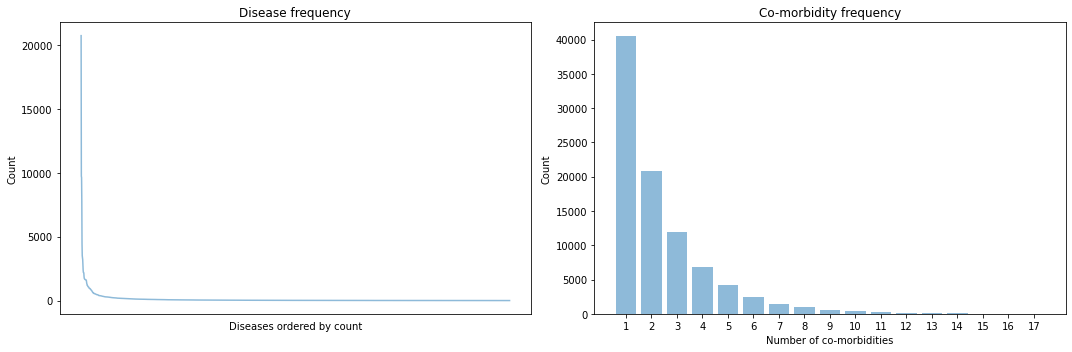

In [42]:
# Plot
# Create subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
fig.set_figheight(5)
#fig.set_figwidth(12)

# Subplot 1: Line graph of disease occurrences
axs[0].plot(problem_sum['Count'], alpha=0.5)
axs[0].set_ylabel('Count')
axs[0].set_xticks([])
axs[0].set_xlabel('Diseases ordered by count')
axs[0].set_title('Disease frequency')

# Subplot 2: Bar chart of comorbidity counts
axs[1].bar(people_sum['Number of co-morbidities'], people_sum['Count'], alpha=0.5)
axs[1].set_xlabel('Number of co-morbidities')
axs[1].set_ylabel('Count')
axs[1].set_title('Co-morbidity frequency')

# Show all x-axis values on Subplot 2
axs[1].set_xticks(people_sum['Number of co-morbidities'])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()